In [160]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

In [5]:
#Tutorial Data set for housing to try out Linear Regression

Boston = load_boston()
print(Boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [92]:
# Let's tranfer the data into a Dataframe

DF=DataFrame(Boston.data)

# These values are equal
# Boston.data[0,12] =  DF[12][0]

Text(0, 0.5, 'No of Houses')

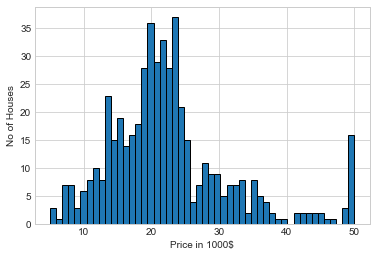

In [57]:
# Let's Check the data
# plotting target= MEDV 
# target is already installed in this educational data set
# Bins data is divided to 50 pieces
# ec = color of the line seperator

plt.hist(Boston.target,bins=50, ec='black')
plt.xlabel("Price in 1000$")
plt.ylabel("No of Houses")

## Single variable Regression

Text(0, 0.5, 'Price')

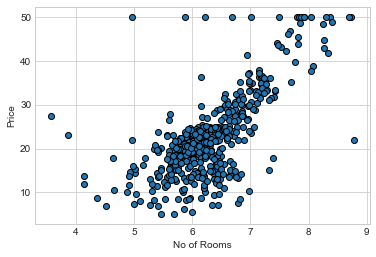

In [48]:
# Let's print out Rooms VS Prices
# Room info is at data[5] to choose all data [:,5]
# scatter x = Room y = Price

plt.scatter(Boston.data[:,5],Boston.target,ec='black')
plt.xlabel("No of Rooms")
plt.ylabel("Price")

#There is a positive correlation with Room and Price, of course!

Text(0, 0.5, 'Price')

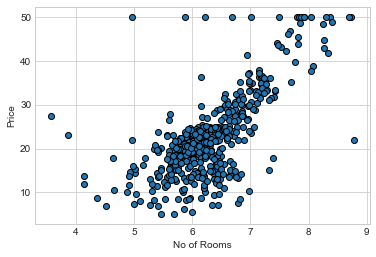

In [58]:
# Same Scatter with DataFrame

plt.scatter(DF[5],Boston.target,ec='black')
plt.xlabel("No of Rooms")
plt.ylabel("Price")

In [93]:
DF.columns = Boston.feature_names
# Specific method for the Boston dataset
# or You can use DF.Columns=["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"]

# See that Target is not in this dataframe.
# We should add this new column
DF["Price"]=Boston.target
DF.head(5)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


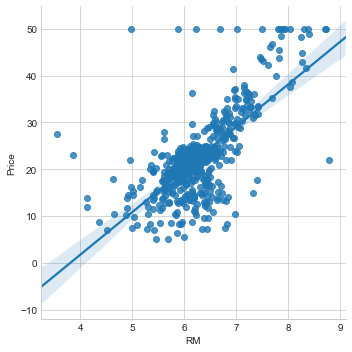

In [98]:
# lmplot creates a linear regression of the two variables -> x= Room y=Price
# Can be utilized for Supervised Learning

sns.lmplot("RM","Price",data=DF)

## Let's use Least Squares Method to do the same

In [149]:
# We will tranform these columns to array
# use vstack to inform numpy how many variables are in data

RoomArray=np.vstack(DF.RM)
PriceArray=DF.Price
RoomArray.shape




# vstack takes one parameter could be list or tuple
#RoomData= np.vstack([DF["RM"],DF["Price"]])
#

## 506x1 matrix

(506, 1)

In [150]:
# This is necessary to call least squares method
# np needs to see how many variables are in the X
# Instead of [value ,] we need to see [value, 1]

RoomArray = np.array( [ [value,1] for value in RoomArray] )
RoomArray

array([[array([ 6.575]), 1],
       [array([ 6.421]), 1],
       [array([ 7.185]), 1],
       ..., 
       [array([ 6.976]), 1],
       [array([ 6.794]), 1],
       [array([ 6.03]), 1]], dtype=object)

In [151]:
# Call Least Squares Method
# m is the slope
# Line formula = m*x+b
m , b = np.linalg.lstsq(RoomArray,PriceArray)[0]

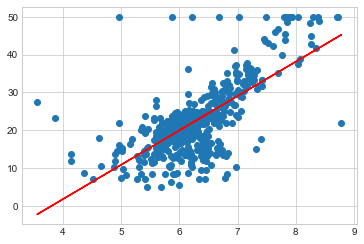

In [152]:
#Plot our normal graph
plt.plot(DF.RM,DF.Price,"o")

x = DF.RM

#Plot our calculated Line
plt.plot(x, m*x +b,"r",label="Best-Fit Line")

In [159]:
# When regressing, there is an error factor. 
# We need to calculate the error to understand the confidence interval

result = np.linalg.lstsq(RoomArray,PriceArray)

# Calculate Standard deviation for Total error 
TotalError = result[1]

error = np.sqrt(TotalError/len(RoomArray))

print("The root mean square error was %.2f" %error)

# Root mean square error :
# Within the %95 confidence interval House Price wont vary more than 2 * RMSE
# Thus -> 6.60*2=13.200 $ is our error 
# If 2 Roomed House is 100k $ within our regression
# We can say with %95 confidence that it is somewhere in between 87k-113k$

### %68 Confidence = 1 std
### %95 Confidence = 2 std
### %99.7 onfidence = 3 std

The root mean square error was 6.60
